# UTSA CS 3793: Assignment-3

**Garcia - Jeremiah - (lnm248)**






## Learning Objectives

Implement 2 different machine learning algorithms
*   Stochastic Gradient Descent
*   ID3 Decision Tree



## Description

This assignment is focused on **machine learning**, mainly on the implementation of 2 different algorithms - Stochastic Gradient Descent & ID3 decision tree.
The assignment is divided into two sections, each for one unique ML algorithm.

The base structure and comments are provided on what should be done. You can use some libraries that help support you for the successful completion of the assignment. However, you **CANNOT** use a complete library that contains the implementation of ML algorithms. You can get pieces of code from online, but please cite the source properly.


##Import Libraries

Write all the import statements here. This should be for both algorithm implmentations. As mentioned before, you can not use any premade ML libraries.

In [174]:
# import all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [175]:
# Assume that the data files are in the following folder -- THIS WILL BE USED BY THE TA
basePath = "/content/drive/My Drive/Colab Notebooks/Artificial Intelligence/Data/"

#Stochastic Gradient Descent

In this section, you will implement the Stochastic Gradient Descent algorithm. The training is for a **binary classification** task i.e. each instance will have a class value of 0 or 1. Also, assume that you are given **all binary-valued attributes** and that there are **no missing values** in the train or test data.


##Algorithm

(40 points)

Following are the data files that will be provided to you for the gradient descent algorithm implementation.

*   Training file - 'gd-train.dat'
*   Testing file - 'gd-test.dat'

In these files, only non-space characters are relevant. The first line contains the attribute names. All the other lines are different example instances to be used for the algorithm. Each column holds values of the attributes, whereas the last column holds the class label for that instance.

Write the code in the following code block, structure is provided. Instructions on the steps to follow are provided as comments.



In [176]:
# Data file name variables
train_file = basePath + "gd-train.dat"
test_file = basePath + "gd-test.dat"

In [177]:
# Read the training and testing data files
def read_data(file_path):
    # Assuming the data format is correctly given as per the description
    # Each line in the file represents a data instance
    # Last value in each line is the class label, all previous values are attributes
    # data = pd.read_csv(file_path, header=None)
    # data = data.apply(pd.to_numeric)
    # Assuming the last column is the class label
    data = pd.read_csv(file_path, header=None, skiprows=1, delimiter="\t")
    X = data.iloc[:, :-1].values
    y = data.iloc[:, -1].values
    return X, y

In [178]:
# Activation Function - implement Sigmoid
def activation_function(h):
    # given 'h' compute and return 'z' based on the activation function implemented
    return 1 / (1 + np.exp(-h))

In [179]:
# Train the model using the given training dataset and the learning rate
# return the "weights" learnt for the perceptron - include the weight assocaited with bias as the last entry
# def train(train_data, learning_rate=0.05):
    # initialize weights to 0
    # go through each training data instance
        # get 'x' as one multi-variate data instance and 'y' as the ground truth class label
        # obtain h(x)
        # call the activation function with 'h' as parameter to obtain 'z'
        # update all weights individually using learning_rate, (y-z), and the corresponding 'x'
    # return the final learnt weights
def train(X, y, learning_rate=0.05):
    # Initialize weights to zeros
    weights = np.zeros(X.shape[1] + 1)  # +1 for bias
    # Iterating over each instance
    for i in range(len(X)):
        # Insert bias term in input data
        xi = np.insert(X[i], 0, 1)  # Add bias = 1
        h = np.dot(xi, weights)
        z = activation_function(h)
        # Update weights
        # weights += learning_rate * (y[i] - z) * xi
        y_i = float(y[i])
        weights += learning_rate * (y_i - z) * xi
    return weights

In [180]:
# Test the model (weights learnt) using the given test dataset
# return the accuracy value
# def test(test_data, weights, threshold):
    # go through each testing data instance
        # get 'x' as one multi-variate data instance and 'y' as the ground truth class label
        # obtain h(x)
        # call the activation function with 'h' as parameter to obtain 'z'
        # use 'threshold' to convert 'z' to either 0 or 1 so as to match to the ground truth binary labels
        # compare the thresholded 'z' with 'y' to calculate the positive and negative instances for calculating accuracy
    # return the accuracy value for the given test dataset
def test(X, y, weights, threshold=0.5):
    correct_predictions = 0
    for i in range(len(X)):
        xi = np.insert(X[i], 0, 1)  # Add bias = 1
        h = np.dot(xi, weights)
        z = activation_function(h)
        prediction = 1 if z >= threshold else 0
        if prediction == y[i]:
            correct_predictions += 1
    accuracy = correct_predictions / len(X)
    return accuracy

In [181]:
# Gradient Descent function
# def gradient_descent(df_train, df_test, learning_rate=0.05, threshold=0.5):
    # call the train function to train the model and obtain the weights
    # call the test function with the training dataset to obtain the training accuracy
    # call the test function with the testing dataset to obtain the testing accuracy
    # return (trainAccuracy, testAccuracy)
training_accuracies = []
testing_accuracies = []
def gradient_descent(train_file, test_file, learning_rates=[0.05, 1]):
    X_train, y_train = read_data(train_file)
    X_test, y_test = read_data(test_file)

    # Initialize lists to store accuracies

    for lr in learning_rates:
        weights = train(X_train, y_train, learning_rate=lr)
        train_accuracy = test(X_train, y_train, weights)
        test_accuracy = test(X_test, y_test, weights)
        print(f"Accuracy for LR of {lr:.2f} on Training set = {train_accuracy}%")
        print(f"Accuracy for LR of {lr:.2f} on Testing set = {test_accuracy}%")
        print()
        training_accuracies.append(train_accuracy)
        testing_accuracies.append(test_accuracy)

In [182]:
# Threshold of 0.5 will be used to classify the instance for the test. If the value is >= 0.5, classify as 1 or else 0.
threshold = 0.5

In [183]:
gradient_descent(train_file, test_file, learning_rates=np.arange(0.05, 1.05, 0.05))

Accuracy for LR of 0.05 on Training set = 0.68%
Accuracy for LR of 0.05 on Testing set = 0.7225%

Accuracy for LR of 0.10 on Training set = 0.68%
Accuracy for LR of 0.10 on Testing set = 0.7175%

Accuracy for LR of 0.15 on Training set = 0.68%
Accuracy for LR of 0.15 on Testing set = 0.7175%

Accuracy for LR of 0.20 on Training set = 0.69%
Accuracy for LR of 0.20 on Testing set = 0.715%

Accuracy for LR of 0.25 on Training set = 0.69%
Accuracy for LR of 0.25 on Testing set = 0.715%

Accuracy for LR of 0.30 on Training set = 0.69%
Accuracy for LR of 0.30 on Testing set = 0.7125%

Accuracy for LR of 0.35 on Training set = 0.69%
Accuracy for LR of 0.35 on Testing set = 0.705%

Accuracy for LR of 0.40 on Training set = 0.7%
Accuracy for LR of 0.40 on Testing set = 0.7075%

Accuracy for LR of 0.45 on Training set = 0.69%
Accuracy for LR of 0.45 on Testing set = 0.69%

Accuracy for LR of 0.50 on Training set = 0.69%
Accuracy for LR of 0.50 on Testing set = 0.695%

Accuracy for LR of 0.55 on 

##Extra Credit - Accuracy Plots

(05 points)

Use the above accuracy results on the training and testing data and write code to plot the graphs as mentioned in the code block below.



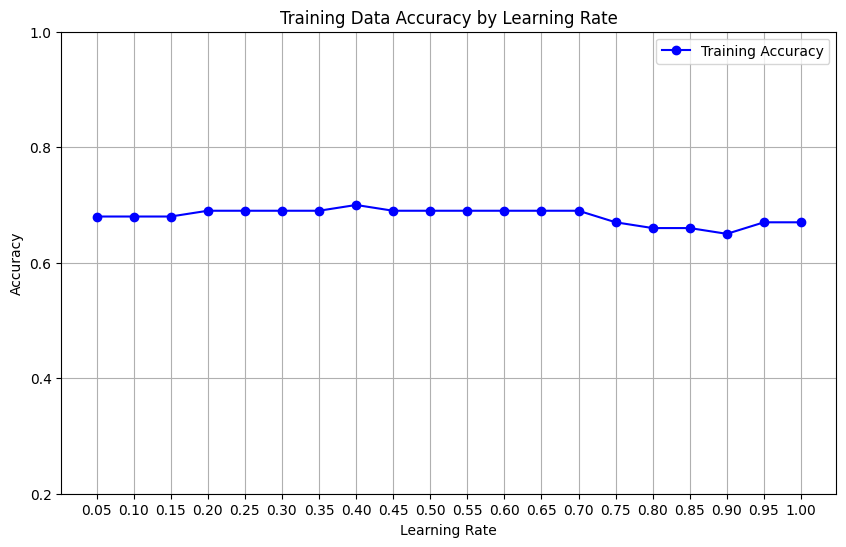

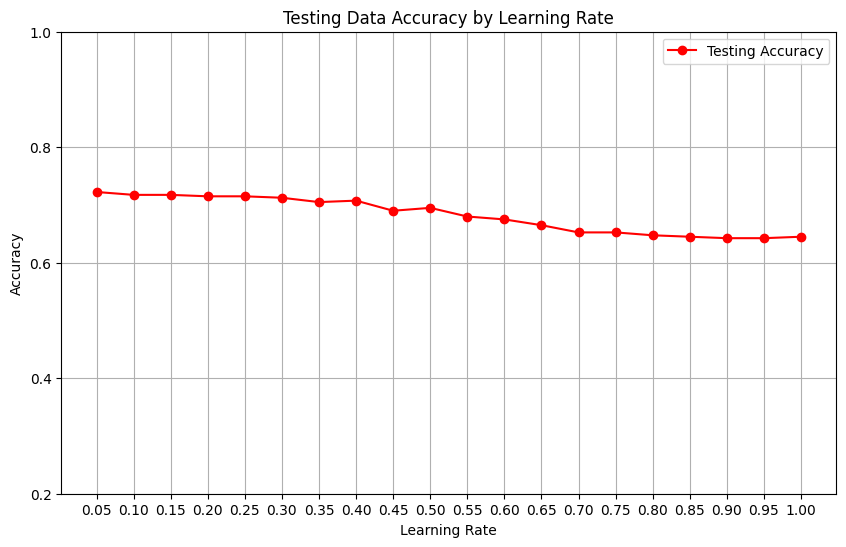

In [184]:
# Plot the graphs for accuracy results.
# There will be 2 graphs - one for training data and the other for testing data
# For each graph,
    # X-axis will be the learning rate going from 0.05-1 in increments on 0.05
    # Y-axis will be the accuracy values at the selected learning rate.
learning_rates = np.arange(0.05, 1.05, 0.05)
# training_accuracies = np.random.uniform(low=0.7, high=1.0, size=len(learning_rates))  # Placeholder values
# testing_accuracies = np.random.uniform(low=0.6, high=0.95, size=len(learning_rates))  # Placeholder values

# Plot for Training Data Accuracy
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, training_accuracies, marker='o', linestyle='-', color='b', label='Training Accuracy')
plt.title('Training Data Accuracy by Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.xticks(learning_rates)
plt.yticks(np.arange(0.2, 1.1, 0.2))
plt.grid(True)
plt.legend()
plt.show()

# Plot for Testing Data Accuracy
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, testing_accuracies, marker='o', linestyle='-', color='r', label='Testing Accuracy')
plt.title('Testing Data Accuracy by Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.xticks(learning_rates)
plt.yticks(np.arange(0.2, 1.1, 0.2))
plt.grid(True)
plt.legend()
plt.show()


#ID3 Decision Tree

In this section, you will implement the ID3 Decision Tree algorithm. The training is for a **binary classification** task i.e. each instance will have a class value of 0 or 1. Also, assume that there are **no missing values** in the train or test data.


## Algorithm

(85 points)

Following are the data files that will be provided to you for the ID3 algorithm implementation.

*   Training file - 'id3-train.dat'
*   Testing file - 'id3-test.dat'

In these files, only non-space characters are relevant. The first line contains the attribute names. All the other lines are example instances to be used for the algorithm. Each column holds values of the attributes, whereas the last column holds the class label for that instance.

In a decision tree, if you reach a leaf node but still have examples that belong to different classes, then choose the most frequent class (among the instances at the leaf node). If you reach a leaf node in the decision tree and have no examples left or the examples are equally split among multiple classes, then choose the class that is most frequent in the entire training set. You do not need to implement pruning. Also, don’t forget to use logarithm base 2 when computing entropy and set (0 log 0) to 0.

Write the code in the following code block, structure is provided. Instructions on the steps to follow are provided as comments. The code should output the following 3 things:

*   Print the Decision Tree created, in the following example format:

    ```
    attr1 = 0 :
        attr2 = 0 :
            attr3 = 0 : 1 -- 4
            attr3 = 1 : 0 -- 9
        attr2 = 1 :
            attr4 = 0 : 0 -- 2
            attr4 = 1 : 1 -- 10
    attr1 = 1 :
        attr2 = 1 : 1 -- 17

    ```

*   Accuracy on the Training data = x %
*   Accuracy on the Test data = x %





In [185]:
class Node:
  def __init__ (self,):
    self.__label = None
    self.__children = {}
    self.__is_leaf = False
    self.__class_label = None
    self.__total_instances = 0

  def get_label(self):
    return self.__label

  def get_children(self):
    return self.__children

  def get_is_leaf(self):
    return self.__is_leaf

  def get_class_label(self):
    return self.__class_label

  def get_total_instances(self):
    return self.__total_instances

  def set_label(self, label):
    self.__label = label

  def set_children(self, children):
    self.__children = children

  def set_is_leaf(self, is_leaf):
    self.__is_leaf = is_leaf

  def set_class_label(self, class_label):
    self.__class_label = class_label

  def set_total_instances(self, total_instances):
    self.__total_instances = total_instances

  def add_child(self, value, child_node):
    self.get_children().update({value: child_node})


  def __str__(self, level=0):
    ret = ""
    if self.get_is_leaf():
        ret += f" : {self.get_class_label()} -- {self.get_total_instances()}"
    ret += "\n"

    for value, child_node in sorted(self.get_children().items()):
        ret += f"{'   ' * level} {self.get_label()} = {value}"
        ret += child_node.__str__(level + 1)

    return ret

# Data file name variables
train = basePath + "id3-train.dat"
test = basePath + "id3-test.dat"



In [186]:
# Pseudocode for the ID3 algorithm. Use this to create function(s).
# def ID3(data, root, attributesRemaining):
    # If you reach a leaf node in the decision tree and have no examples left or the examples are equally split among multiple classes
        # Choose and the class that is most frequent in the entire training set and return the updated tree
    # If all the instances have only one class label
        # Make this as the leaf node and use the label as the class value of the node and return the updated tree
    # If you reached a leaf node but still have examples that belong to different classes (there are no remaining attributes to be split)
        # Assign the most frequent class among the instances at the leaf node and return the updated tree
    # Find the best attribute to split by calculating the maximum information gain from the attributes remaining by calculating the entropy
    # Split the tree using the best attribute and recursively call the ID3 function using DFS to fill the sub-tree
    # return the root as the tree
def ID3(all_data, data, root, attributesRemaining):
  class_count = data['class'].value_counts()

  # If all the instances have only one class label
  if data['class'].nunique() == 1:
    # Make this as the leaf node and use the label as the class value of the node and return the updated tree
    root.set_is_leaf(True)
    root.set_class_label(data['class'].unique()[0])
    root.set_total_instances(data.shape[0])
    return

  # If you reach a leaf node in the decision tree and have no examples left or the examples are equally split among multiple classes
  elif data.empty or ((data['class'].nunique() != 1) and (class_count[0] == class_count[1])):
    root.set_is_leaf(True)
    all_class_count = all_data['class'].value_counts()
    # Choose and the class that is most frequent in the entire training set and return the updated tree
    root.set_class_label(all_class_count.idxmax())
    root.set_total_instances(data.shape[0])
    return

  # If you reached a leaf node but still have examples that belong to different classes (there are no remaining attributes to be split)
  elif not attributesRemaining and (data['class'].nunique() != 1):
    # Assign the most frequent class among the instances at the leaf node and return the updated tree
    root.set_is_leaf(True)
    root.set_class_label(class_count.idxmax())
    root.set_total_instances(data.shape[0])
    return

  curr_class_count = data['class'].value_counts()
  curr_instances = all_data.shape[0]

  if len(curr_class_count) < 2:
    if curr_class_count.index[0] != 0:
      curr_true = curr_class_count[1]/curr_instances
      curr_entropy = 0 + (-curr_true * np.log2(curr_true))
    elif curr_class_count.index[0] != 1:
      curr_false = curr_class_count[0]/curr_instances
      curr_entropy = (-curr_false * np.log2(curr_false)) + 0
  else:
    curr_false = curr_class_count[0]/curr_instances
    curr_true = curr_class_count[1]/curr_instances
    curr_entropy = (-curr_false * np.log2(curr_false)) + (-curr_true * np.log2(curr_true))

  aig = {}

  for attribute in attributesRemaining:
    # Calculate counts and instances for when the attribute is 0
    attribute_class_count_0 = data[data[attribute] == 0]['class'].value_counts()
    attribute_instances_0 = data[data[attribute] == 0]['class'].shape[0]

    if attribute_instances_0 > 0:
        attribute_false_0 = attribute_class_count_0.get(0, 0) / attribute_instances_0
        attribute_true_0 = attribute_class_count_0.get(1, 0) / attribute_instances_0
        attribute_entropy_0 = 0
        if attribute_false_0 > 0:
            attribute_entropy_0 += (-attribute_false_0 * np.log2(attribute_false_0))
        if attribute_true_0 > 0:
            attribute_entropy_0 += (-attribute_true_0 * np.log2(attribute_true_0))
    else:
        attribute_entropy_0 = 0

    # Repeat the process for when the attribute is 1
    attribute_class_count_1 = data[data[attribute] == 1]['class'].value_counts()
    attribute_instances_1 = data[data[attribute] == 1]['class'].shape[0]

    # Safe division to calculate probabilities and entropy for attribute == 1
    if attribute_instances_1 > 0:
        attribute_false_1 = attribute_class_count_1.get(0, 0) / attribute_instances_1
        attribute_true_1 = attribute_class_count_1.get(1, 0) / attribute_instances_1
        attribute_entropy_1 = 0
        if attribute_false_1 > 0:
            attribute_entropy_1 += (-attribute_false_1 * np.log2(attribute_false_1))
        if attribute_true_1 > 0:
            attribute_entropy_1 += (-attribute_true_1 * np.log2(attribute_true_1))
    else:
        attribute_entropy_1 = 0

    # Calculate weighted average entropy and information gain for the attribute
    weighted_avg_entropy = ((attribute_instances_0 / curr_instances) * attribute_entropy_0 +
                            (attribute_instances_1 / curr_instances) * attribute_entropy_1)

    ig = curr_entropy - weighted_avg_entropy
    aig.update({attribute: ig})

  best_attribute = max(aig, key=aig.get)
  new_attributes_remaining = attributesRemaining.copy()
  for attribute in new_attributes_remaining:
    if attribute == best_attribute:
      new_attributes_remaining.remove(attribute)

  root.set_label(best_attribute)

  # Not Leaf

  for value in data[best_attribute].unique():

    # Split the tree using the best attribute and recursively call the ID3 function using DFS to fill the sub-tree
    child_node = Node()
    new_data = data[data[best_attribute] == value].drop(columns=[best_attribute])

    ID3(all_data, new_data, child_node, new_attributes_remaining)
    root.add_child(value, child_node)

  return



In [187]:
# Following is the base code structure. Feel free to change the code structure as you see fit, maybe even create more functions.

# Read the first line in the training data file, to get the number of attributes
# Read all the training instances and the ground truth class labels.
# Create the decision tree by implementing the ID3 algorithm. Pseudocode provided above.
# Print the tree in the example format mentioned.
# Use the above created tree to predict the training data and print the accuracy as "Accuracy on the Training data = x %"
    # For each training instance, predict the output label
    # Compare it with the ground truth class label and calculate the accuracy accordingly
# Use the above created tree to predict the testing data and print the accuracy as "Accuracy on the Test data = x %"
    # For each testing instance, predict the output label
    # Compare it with the ground truth class label and calculate the accuracy accordingly

train_instances_df = pd.read_csv(train, delimiter='\t')
test_instances_df = pd.read_csv(test, delimiter='\t')

attributes = list(train_instances_df.columns)
# Remove class from attributes list
attributes.pop(-1)

# Create the decision tree by implementing the ID3 algorithm. Pseudocode provided above.
tree_root = Node()
ID3(train_instances_df, train_instances_df.copy(), tree_root, attributes)

# Print the tree in the example format mentioned.
print(tree_root)

# Use the above created tree to predict the training data and print the accuracy as "Accuracy on the Training data = x %"
training_count = 0
training_correct = 0
prev_node = None
# For each training instance, predict the output label
for index, instance in train_instances_df.iterrows():
  training_count += 1
  curr_node = tree_root
  while not curr_node.get_is_leaf():
    if(not curr_node.get_is_leaf()):
      node_value = instance[curr_node.get_label()]
      prev_node = curr_node
      curr_node = curr_node.get_children().get(node_value)
  if curr_node.get_class_label() == instance['class']:
    training_correct += 1

# Compare it with the ground truth class label and calculate the accuracy accordingly
training_acc = training_correct / training_count
print(f"Accuracy on the Training data = {training_acc}%")


# Use the above created tree to predict the testing data and print the accuracy as "Accuracy on the Test data = x %"
testing_count = 0
testing_correct = 0
prev_node = None
    # For each testing instance, predict the output label
for index, instance in test_instances_df.iterrows():
  testing_count += 1
  curr_node = tree_root
  while not curr_node.get_is_leaf():
    if(not curr_node.get_is_leaf()):
      node_value = instance[curr_node.get_label()]
      prev_node = curr_node
      curr_node = curr_node.get_children().get(node_value)
  if curr_node.get_class_label() == instance['class']:
    testing_correct += 1
    # Compare it with the ground truth class label and calculate the accuracy accordingly
test_acc = testing_correct / testing_count
print(f"Accuracy on the Test data = {test_acc}%")




 attr5 = 0
    attr6 = 0
       attr2 = 0
          attr1 = 0
             attr4 = 0
                attr3 = 0 : 0 -- 9
                attr3 = 1 : 0 -- 12
             attr4 = 1
                attr3 = 0 : 0 -- 13
                attr3 = 1 : 0 -- 14
          attr1 = 1
             attr4 = 0
                attr3 = 0 : 0 -- 15
                attr3 = 1 : 0 -- 10
             attr4 = 1 : 0 -- 30
       attr2 = 1
          attr4 = 0
             attr3 = 0 : 0 -- 25
             attr3 = 1
                attr1 = 0 : 0 -- 11
                attr1 = 1 : 0 -- 18
          attr4 = 1
             attr1 = 0
                attr3 = 0 : 0 -- 10
                attr3 = 1 : 0 -- 18
             attr1 = 1
                attr3 = 0 : 0 -- 12
                attr3 = 1 : 0 -- 17
    attr6 = 1
       attr4 = 0
          attr2 = 0
             attr3 = 0
                attr1 = 0 : 0 -- 11
                attr1 = 1 : 0 -- 13
             attr3 = 1
                attr1 = 0 : 0 -- 9
                attr1

##Extra Credit - Learning Curve

(05 points)

Instead of taking the entire training data (all 800 instances), loop through to select 'x' instances in the increments of 40 (i.e. 40, 80, 120, and so on). For each selected number 'x', randomly pick the example instances from the training data and call the ID3 function to create the decision tree. Calculate the accuracy of the created ID3 tree on the Test data file. Plot the corresponding graph, aka Learning Curve.


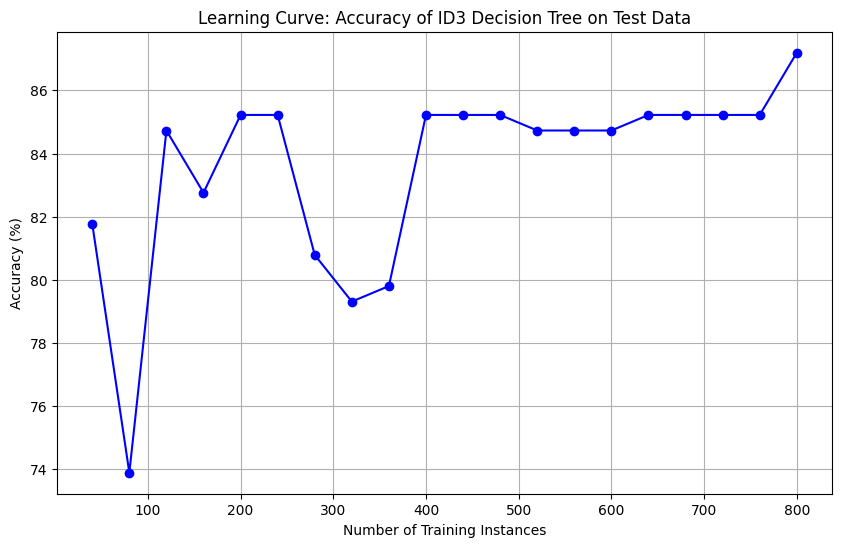

In [188]:
# Loop through to select the number of instances 'x' in increments of 40
# For each 'x',
    # Randomly select 'x' instances
    # Create the ID3 decision tree using those instances
    # Calculate the accuracy of the ID3 tree created on the Test data

# Plot the learning curve using the accuracy values
    # X-axis will be the number of training instances used for creating the tree
    # Y-axis will be the accuracy in % on the Test data

def calculate_accuracy(tree_root, data):
    correct = 0
    for index, instance in data.iterrows():
        curr_node = tree_root
        while not curr_node.get_is_leaf():
            node_value = instance[curr_node.get_label()]
            if node_value in curr_node.get_children():
                curr_node = curr_node.get_children().get(node_value)
            else:
                break  # Handle unseen attribute value case
        if curr_node.get_is_leaf() and curr_node.get_class_label() == instance['class']:
            correct += 1
    return correct / len(data)

# Define ranges for 'x' (40, 80, 120, ..., up to size of train_instances_df)
increment = 40
max_instances = len(train_instances_df)
instances_range = range(increment, min(max_instances, 800) + 1, increment)

# Initialize list to keep track of accuracies
accuracies = []

for x in instances_range:
    # Randomly select 'x' instances from the training data
    sampled_data = train_instances_df.sample(n=x, random_state=42)

    # Create a new tree root for each iteration
    tree_root = Node()

    # Run ID3 on the sampled data
    ID3(sampled_data, sampled_data, tree_root, attributes)

    # Calculate accuracy on the test data
    accuracy = calculate_accuracy(tree_root, test_instances_df) * 100
    accuracies.append(accuracy)

# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.plot(instances_range, accuracies, marker='o', linestyle='-', color='b')
plt.title('Learning Curve: Accuracy of ID3 Decision Tree on Test Data')
plt.xlabel('Number of Training Instances')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.show()


#Submission Instructions

1.   Complete all tasks above - **File MUST contain the output for ALL cells**
2.   Export this notebook as .ipynb
      (File > Download as ipynb)
3.   Upload the .ipynb file on Blackboard

##Rubric

*   (40 points) Gradient Descent Algorithm
*   (05 points) Extra Credit - GD Accuracy Plots
*   (85 points) ID3 Algorithm
*   (05 points) Extra Credit - ID3 Learning Curve
